In [30]:
import numpy as np
import h5py
import os
import pandas as pd

In [41]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Populating the interactive namespace from numpy and matplotlib


In [53]:
savedirs = {
    'normal': '../results/cartpole_ddpg0/normal_buffer/',
    'prioritized': '../results/cartpole_ddpg0/prioritized_buffer/'
}

In [27]:
def loadHDF5(filepath):
    output = {}
    with h5py.File(filepath,'r') as f:
        for k in f:
            output[k] = np.array(f[k])
    return output

In [31]:
results = {}
for sd in savedirs:
    results[sd] = {}
    data = []
    for rd in os.listdir(savedirs[sd]):
        filepath = os.path.join(savedirs[sd],rd,'log.h5')
        
        if os.path.exists(filepath):
            data.append(loadHDF5(filepath))
            
        keys = data[0].keys()
        for k in keys:
            results[sd][k] = np.stack([v[k] for v in data])

In [34]:
results[sd].keys()

dict_keys(['action_history', 'duration_cumulative', 'reward_history', 'step_duration_sec', 'test_ep_returns', 'test_ep_steps'])

In [35]:
results[sd]['test_ep_returns'].shape

(10, 199)

In [49]:
def plot_percentiles(x,y=None,label=None):
    if y is None:
        y = x
        x = np.arange(len(y))
    p10 = np.percentile(y,10,axis=1)
    mean = y.mean(axis=1)
    p90 = np.percentile(y,90,axis=1)
    plt.fill_between(x,p10,p90,alpha=0.25)
    plt.plot(x,mean,label=label)

In [50]:
results[sd]['test_ep_steps'].shape

(10, 199)

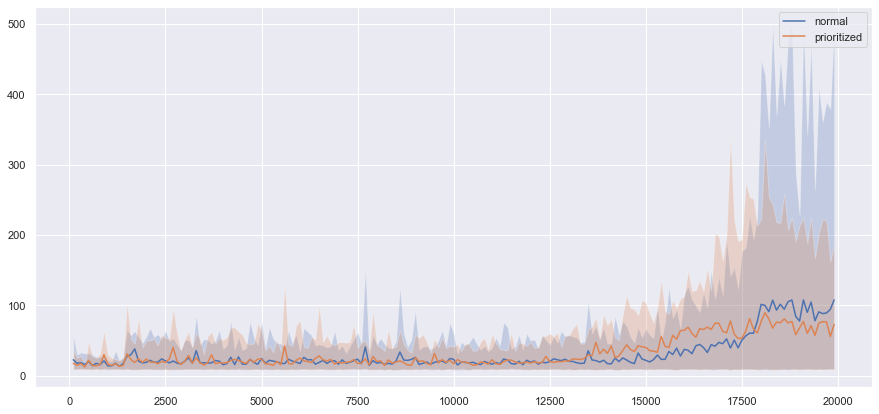

In [52]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in results:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()